# Лекция 10. Методы обучения глубоких нейронных сетей. Activation function. Инициализация весов. Batch-нормализация. Оптимизаторы. Машинное обучение в иммунологии.


## Обучение сети. Обратное распространение ошибки.

Суть:

Во время обучения нейронная сеть просматривает обучающую выборку некоторым образом, считает ошибки и обновляет веса градиентным спуском.

Более формально:

Пусть функция активации это сигмоида $\sigma$, функционал качества $C$ - MSE, в сети $L$ слоёв нейронов.

1. Подайте сети набор обучающих примеров.
2. Для каждого обучающего примера $ x $:
   * Посчитайте активацию входа $ a ^ {x, 1} $ и выполните следующие действия:
  
     * Прямой проход: для каждого $ l = 2, 3, \ldots, L $ вычислить
     $ z ^ {x, l} = w ^ l a ^ {x, l-1} + b ^ l $ и $ a ^ {x, l} = \sigma (z ^ {x, l}) $.
     * Ошибка предсказания $ \delta ^ {x, L} $:
     вычислить вектор $ \delta ^ {x, L} = \nabla_a C_x \odot \sigma '(z ^ {x, L}) $.
     * Обратное распространение ошибки: для каждого $ l = L-1, L-2, \ldots, 2 $ вычислить $ \delta ^ {x, l} = ((w ^ {l + 1}) ^ T \delta ^ { x, l + 1}) \odot \sigma '(z ^ {x, l}) $.
3. Градиентный спуск: для каждого $ l = L, L-1, \ldots, 2 $.
   обновить веса согласно правилу $ w ^ l \rightarrow
   w ^ l- \frac {\eta} {m} \sum_x \delta ^ {x, l} (a ^ {x, l-1}) ^ T $, и
   смещения по правилу $ b ^ l \rightarrow b ^ l- \frac {\eta} {m}
   \sum_x \delta ^ {x, l} $.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/backpr.png" alt="Drawing" width= "1000px;" align="center"/>

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/backprop_animation.gif" alt="Drawing" width= "800px;"/>

### Батчи, эпохи

Когда backprop делается по каждому отдельному объекту, это называется стохастический градиентный спуск. В реальности обычно используется т.н. пакетный (batch) градиентный спуск.

Батч - набор данных, который "просматривает" нейросеть до того, как обновить веса. Градиентный спуск можно делать не только по отдельным образцам, но и по любому их количеству.

Эпоха - период обучения, за который нейросеть "просматривает" все обучающие образцы один раз. Обычно на практике нейросети обучают за много эпох.

## Функции активации

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/activation.png" alt="Drawing" width= "800px;"/>

и многие-многие другие...

### Логистическая функция (сигмоида)



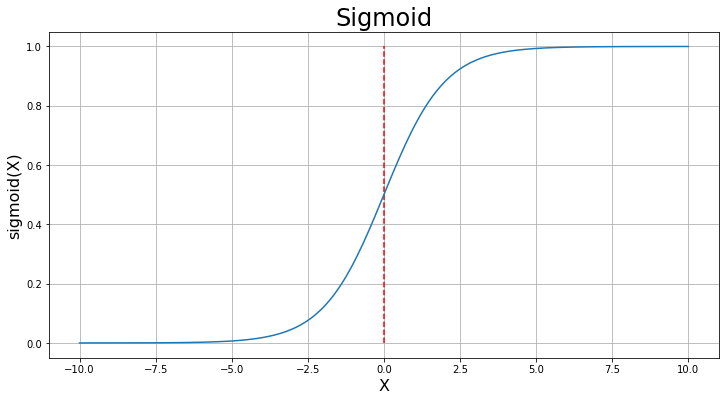

In [ ]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from torch import nn


func = nn.Sigmoid()
x = torch.arange(-10, 10.1, 0.1)
plt.figure(figsize=(12, 6))
plt.grid()
plt.xlabel('X', fontdict={'fontsize': 16})
plt.ylabel('sigmoid(X)', fontdict={'fontsize': 16})
plt.title('Sigmoid', fontdict={'fontsize': 24})
plt.plot(x, func(x));
plt.vlines(0, 0, 1, 'r', '--');

$$\sigma(z) = \dfrac 1 {1 + e^{-z}}$$


**Плюсы:**

Как и для любой другой адекватной функции активации, благодаря нелинейности сигмоиды можно улавливать сложные зависимости в данных, когда сигмоиды организованы в многослойные сети.

Еще одно достоинство такой функции — она монотонная и для неё характерен гладкий градиент.

Можно использовать в качестве единственного нейрона выходного слоя нейросети  в задачах бинарной классификации, а её значение интерпретировать как вероятность отнесения объекта к первому классу.


**Минусы:**

Функция насыщается при устремлении аргумента в плюс или минус бесконечность. Насыщение сигмоиды приводит к затуханию градиентов и остановке обучения сети.

Выход сигмоиды не центрирован относительно нуля, что влияет на ход градиентного спуска. Когда значения, поступающие в нейрон в качестве входа, всегда положительны, тогда в процессе обратного распространения ошибки все градиенты весов будут либо только положительны, либо только отрицательны. Это является большим недостатков в стохастическом градиентном спуске, но менее опасно при использовании мини-батчей.


Откуда берётся затухание?

$$\dfrac {\delta \sigma(z)} {\delta z} = \sigma(z) (1 - \sigma(z))$$

Максимальное значение производной сигмоиды - 0.25

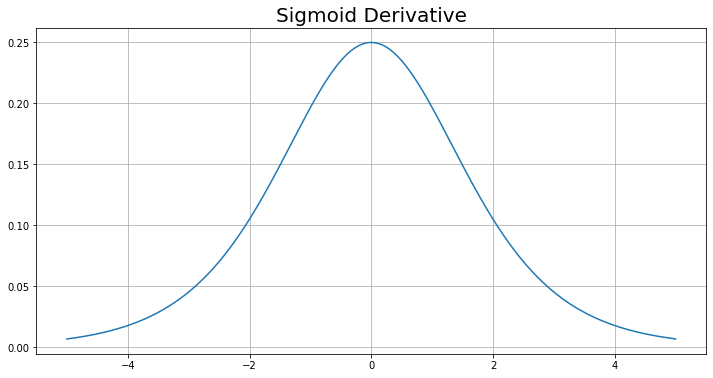

In [ ]:
func = nn.Sigmoid()
x = torch.arange(-5, 5, .0001)
sig_deriv = func(x) * (1 - func(x))

plt.figure(figsize=(12, 6))
plt.grid()
plt.title("Sigmoid Derivative", fontsize=20)
plt.plot(x, sig_deriv);

Возьмём простую сеть:

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/simple_net.png" alt="Drawing" width= "800px;"/>

Градиент по $z_4$:

$$\dfrac {\delta L} {\delta z_4} = \dfrac {\delta L} {\delta y} \dfrac {\delta y} {\delta z_4} = \dfrac {\delta L} {\delta y} \dfrac {\delta \sigma(w_5z)} {\delta z} w_5 \le \dfrac 1 4 \dfrac {\delta L} {\delta y}  w_5 $$

Градиент по $z_3$:

$$\dfrac {\delta L} {\delta z_3} = \dfrac {\delta L} {\delta z_4} \dfrac {\delta z_4} {\delta z_3} \le \dfrac {\delta L} {\delta y} \dfrac {\delta \sigma(w_5z)} {\delta z} w_5 \le {\dfrac 1 4}^2 \dfrac {\delta L} {\delta y}  w_5 w_4$$


И так далее... В итоге получаем экспоненциально убывающую/возрастающую (в зависимости от значений весов) функцию:

$$\dfrac {\delta L} {\delta x}  \le {\dfrac 1 4}^5 \dfrac {\delta L} {\delta y}  w_5 w_4 w_3 w_2 w_1$$

### Гиперболический тангенс

$$ tanh(z) = \frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$$

Принципиально это практически та же сигмоида, только центрированная относительно нуля. Стоит помнить, что производная здесь круче, чем у сигмоиды, а в остальном они похожи.

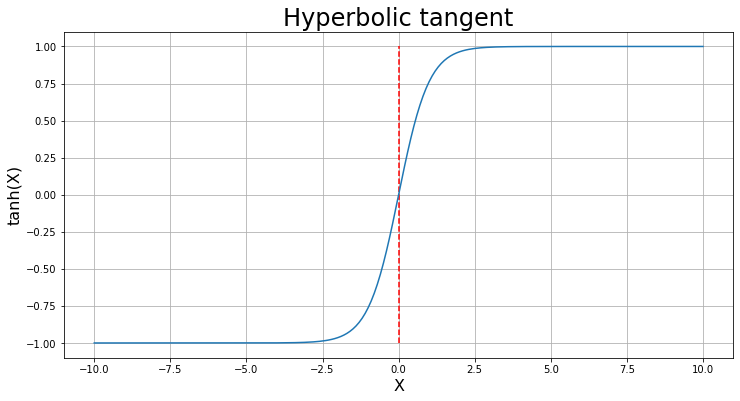

In [ ]:
func = nn.Tanh()
x = torch.arange(-10, 10.1, 0.1)
plt.figure(figsize=(12, 6))
plt.grid()
plt.xlabel('X', fontdict={'fontsize': 16})
plt.ylabel('tanh(X)', fontdict={'fontsize': 16})
plt.title('Hyperbolic tangent', fontdict={'fontsize': 24})
plt.plot(x, func(x));
plt.vlines(0, -1, 1, 'r', '--');

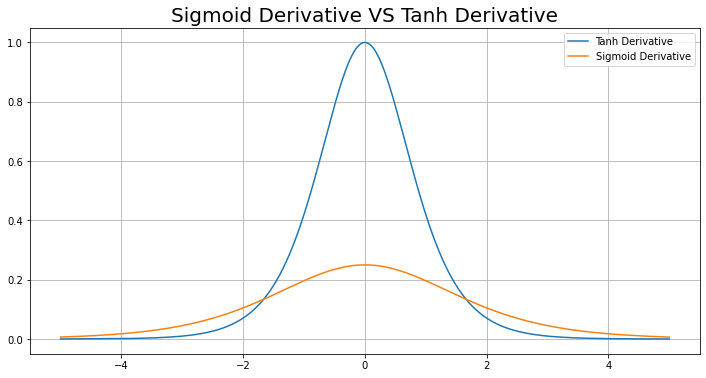

In [ ]:
func = nn.Sigmoid()
x = torch.arange(-5, 5, .0001)
sig_deriv = func(x) * (1 - func(x))

func = nn.Tanh()
tanh_deriv = 1 - func(x)**2

plt.figure(figsize=(12, 6))
plt.grid()
plt.title("Sigmoid Derivative VS Tanh Derivative", fontsize=20)
plt.plot(x, tanh_deriv, label='Tanh Derivative')
plt.plot(x, sig_deriv, label='Sigmoid Derivative')
plt.legend();

### ReLU (rectified linear unit)

Пороговый переход в нуле.


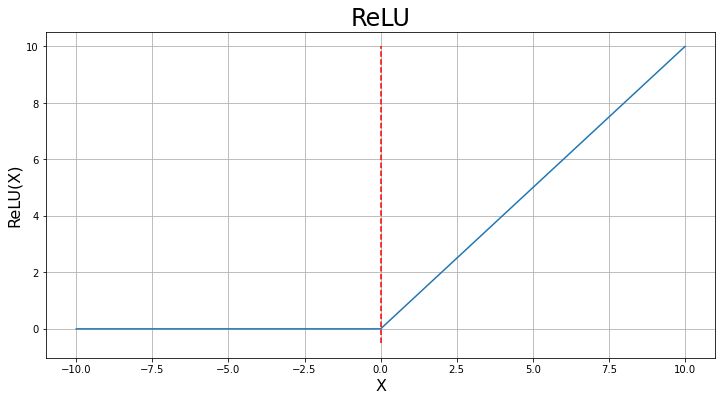

In [ ]:
func = nn.ReLU()
x = torch.arange(-10, 10.1, 0.1)
plt.figure(figsize=(12, 6))
plt.grid()
plt.xlabel('X', fontdict={'fontsize': 16})
plt.ylabel('ReLU(X)', fontdict={'fontsize': 16})
plt.title('ReLU', fontdict={'fontsize': 24})
plt.plot(x, func(x));
plt.vlines(0, -0.5, 10, 'r', '--');

**Плюсы:**

Крайне проста вычислительно, не требует выполнения ресурсоемких операций, очень ускоряет обучение с технической точки зрения.

ReLU не подвержена насыщению.

**Минусы:**

Большой градиент, проходящий через ReLU, может привести к такому обновлению весов, что данный нейрон никогда больше не активируется - зануление градиента. При слишком большой скорости обучения таким образом можно убить значительную часть нейросети.

### Leaky ReLU

При $x < 0$ значение функции не чистый 0, а $α*x$, обычно $α = 0.01$

Попытка решить проблему умирания ReLU, т.к. градиент не зануляется полностью.

Помимо, Leaky ReLU, существует целый ряд других модификаций ReLU с теми или иными эмпириками. Чаще всего всё равно используется ReLU, т.к. сложно подобрать дополнительные гиперпараметры, а в случае с ReLU проблема умирания решается подбором одной скорости обучения.

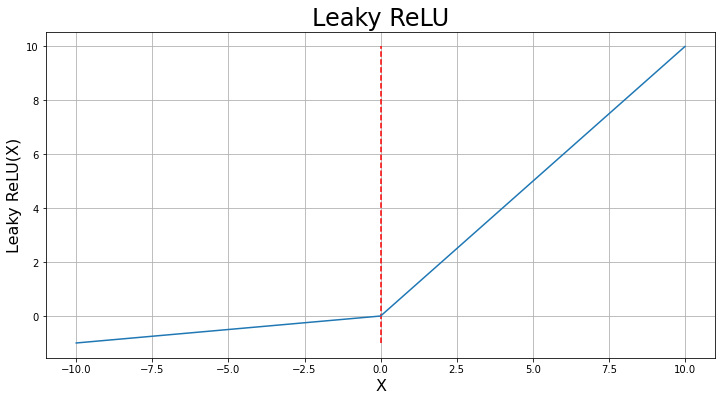

In [ ]:
func = nn.LeakyReLU(negative_slope=0.1)
x = torch.arange(-10, 10.1, 0.1)
plt.figure(figsize=(12, 6))
plt.grid()
plt.xlabel('X', fontdict={'fontsize': 16})
plt.ylabel('Leaky ReLU(X)', fontdict={'fontsize': 16})
plt.title('Leaky ReLU', fontdict={'fontsize': 24})
plt.plot(x, func(x));
plt.vlines(0, -1, 10, 'r', '--');

### GELU (Gaussian Error Linear Unit)

$GELU = x*Φ(x) = x*P(X \leq x)$,

где $P(X \leq x)$ - функция распределения стандартного нормального распределения.

Используется в SOTA NLP моделях.

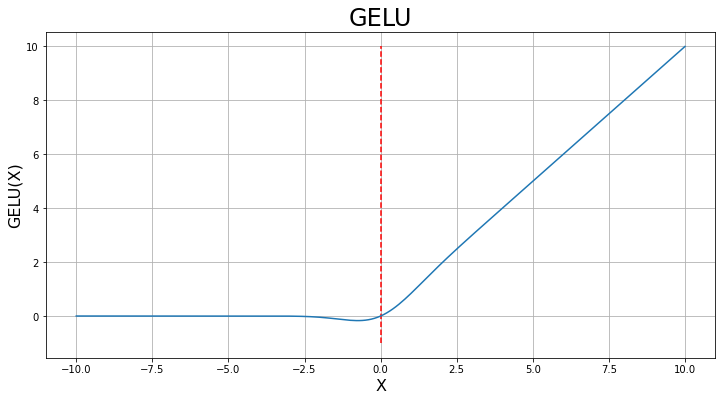

In [ ]:
func = nn.GELU()
x = torch.arange(-10, 10.1, 0.1)
plt.figure(figsize=(12, 6))
plt.grid()
plt.xlabel('X', fontdict={'fontsize': 16})
plt.ylabel('GELU(X)', fontdict={'fontsize': 16})
plt.title('GELU', fontdict={'fontsize': 24})
plt.plot(x, func(x));
plt.vlines(0, -1, 10, 'r', '--');

## Инициализация весов

Можно не заморачиваться и инициализировать веса нейросети некоторыми константами. Проблема тут понятна: если исходно все веса равны, то и градиенты будут сдвигаться синхронно, и нейроны в рамках слоя будут одинаковы, что не имеет смысла.

Существует распространённый подход инициализации нормальным шумом с матожиданием 0 и небольшой дисперсией. Случайность чисел позволит избавиться от проблемы "одинаковости" нейронов, а то, что они небольшие, от того, что градиент взорвётся из-за больших ошибок на первых шагах обучения. Однако на практике происходит так, что в глубоких нейросетях первые слои, до которых градиент доходит последним, получают его значения, близкие к нулю, из-за этого происходит паралич сети.


### Инициализация Ксавье

Мы хотели бы, чтобы все активации имели одинаковые распределения, ну или хотя бы дисперсии. Посмотрим, как можно к этому прийти.

Рассмотрим в качестве функции активации гиперболический тангенс. Лучше инициализировать из линейного региона этой функции, чтобы избежать затухающих градиентов.

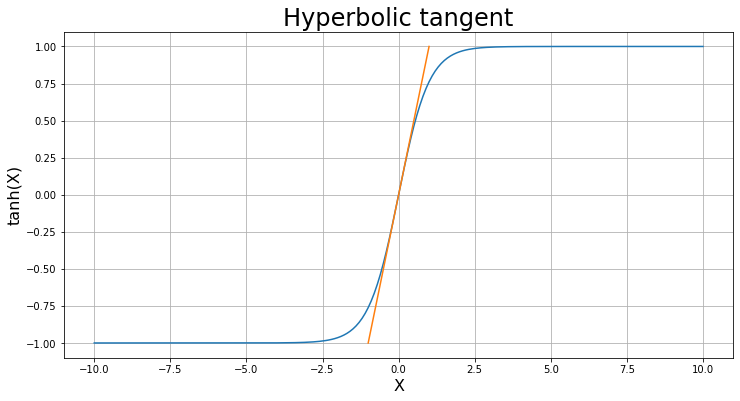

In [ ]:
func = nn.Tanh()
x = torch.arange(-10, 10.1, 0.1)
plt.figure(figsize=(12, 6))
plt.grid()
plt.xlabel('X', fontdict={'fontsize': 16})
plt.ylabel('tanh(X)', fontdict={'fontsize': 16})
plt.title('Hyperbolic tangent', fontdict={'fontsize': 24})
plt.plot(x, func(x));
plt.plot([-1, 1], [-1, 1]);

В этом участке, близком к линейному, активации на следующем слое ($i+1$) зависят от активаций на текущем ($i$) следующим образом: $z^{i+1} \approx z^i W^i$

Для того, чтобы понять, что будет происходить во время обучения, надо понять, как дисперсии активаций на следующем слое зависят от активаций на текущем. Для веса следующего слоя: $z^{i+1}_{k} = \sum_t z^i_t w_{kt}$, дисперсия: $D(z^{i+1}_{k}) = D(\sum_t z^i_t w_{kt}) = \sum_t D(z^i_t w_{kt})$.

Предполагая, что дисперсии весов и активаций одинаковые: $D(z^{i+1}_{k}) = n D(z^i_0 w_{k0})$

Зная формулу дисперсии произведения независимых случайных величин: $D(z^{i+1}_{k}) = n [E(z^i_0)^2E(w_{k0})^2 - (Ez^i_0)^2(Ew_{k0})^2]$

Для центрирования активаций отцентрируем веса: $D(z^{i+1}_{k}) =   n E(z^i_0)^2E(w_{k0})^2 $.

Т.к. теперь матожидание активаций и весов равны 0, то матожидания их квадратов равны дисперсиям активаций и весов соответственно $Dz = E(z^{i+1}_{k})^2 - (Ez^{i+1}_{k})^2 = E(z^{i+1}_{k})^2$ и $D(z^{i+1}_{k}) = n Dz^i_0Dw_{k0}$

Теперь можем записать формулу зависимости активаций любого слоя от весов предуыдущих слоев и дисперсии исходных данных: $Dz^i = Dx \prod_{p=0}^{i-1}n_pDW^p$, где $n_p$ - размерность выхода $p$-го слоя

Аналогично, формула для градиентов по активациям: $D(\dfrac {\delta L} {\delta z^i}) = D(\dfrac {\delta L} {\delta z^d} ) \prod_{p=i}^{d}n_{p+1}DW^p$

Для хорошей инициализации нам бы хотелось, чтобы дисперсии активаций и градиентов на всех слоях были одинаковые, в таком случае не происходит резких скачков в распределении активаций, а градиент не затухает и не взрывается.
Т.е., $Dz^i = Dz^j$ и $D\dfrac {\delta L} {\delta z^i} = D\dfrac {\delta L} {\delta z^j}$.

Эквивалентно этому: $n_iDW^i = 1$, и $n_{i+1}DW^i = 1$, но одновременно так сделать не получится, $n_i \ne n_{i+1}$.

Потому делают среднее гармонческое решений первого и второго уравнения:

$$DW^i = \dfrac 2 {n_i + n_{i+1}}$$

Надо выбрать распределение, чтобы $ EW^i = 0 $, а дисперсия была равна указанной выше. Берут равномерное следующего вида:
$$W_i \sim U[-\dfrac {\sqrt{6}} {\sqrt{n_i + n_{i + 1}}}, \dfrac {\sqrt{6}} {\sqrt{n_i + n_{i + 1}}}]$$



### Инициализация Ге
Так как чаще вместо гиперболического тангенса или сигмоиды используется ReLU, применение инициализации Ксавье проблематично, ведь ReLU в 0 не имеет производной.

Получаются похожие условия:

$Dz^i = Dx \prod_{p=0}^{i-1}\dfrac 1 2 n_pDW^p$,

и $D(\dfrac {\delta L} {\delta z^i}) = D(\dfrac {\delta L} {\delta z^d} ) \prod_{p=i}^{d}\dfrac 1 2 n_{p+1}DW^p$

Решения тоже похожие: $\frac 2 {n_k}$ и $\frac 2 {n_{k+1}}$

На этот раз на практике вместо среднего гармонического обычно берут либо $ \frac 2 {n_i}$ либо $\frac 2 {n_i + 1}$

$$W^i \sim N(0, sd=\sqrt{\frac 2 n_i})$$

$$W^i \sim N(0, sd=\sqrt{\frac 2 {n_i + 1}})$$

Опять же, можно использовать и равномерное распределение.

### Ортогональная инициализация

Выберем ортогональную матрицу весов $W: WW^T = 1$

Тогда:
1. Активации между слоями остаются в одном масштабе
$$||s_{i+1}|| = ||W_{i}s_i|| = ||s_i||$$

2.  Все нейроны делают разные преобразования
$$ ⟨W_i, W_j⟩ = 0~i \ne j$$
$$ ⟨W_i, W_j⟩ = 1~i = j$$




Для инициализации весов Pytorch используется модуль `torch.nn.init`

## Dropout

Dropout - распространённый метод регуляризации в DL.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/dropout.png" alt="Drawing" width= "800px;"/>

Суть метода:

1. Во время обучения с вероятностью $p$ зануляется выход нейронов слоя
2. Зануленные нейроны не участвуют в данном шаге forward propagation, и градиент при backward propagation к ним не идет.
3. Сила регуляризации определяется вероятностью $p$, чем она больше - тем сильнее регуляризация.
4. Во время предсказания активации домножаются на $1-p$.

Dropout выступает как:

1. **Борьба с коадаптацией:**
  * При работе глубоких сетей бывает совместная адаптация нейронов. Часть нейронов делает основную работу - предсказывает, а остальные могут вообще не вносить никакого вклада в итоговое предсказание. Или же другая картина - один нейрон делает кривоватое предсказание, другие его правят и в итоге первый нейрон своей ошибки не исправляет. Это явление называется коадаптацией. Dropout с этим хорошо борется.

2. **Регуляризация:**
  * Dropout делает нейросеть более устойчивой к шуму, т.к. он штрафует более сложные решения.

3. **Ансамбль моделей:**
  * Нейросеть с Dropout выступает как ансамбль нейросетей с той же топологией слоёв, что в исходной сети, но меньшим количеством нейронов. Эти нейросети учатся одновременно, а результат их предсказания усредняется при заморозке Dropout.

4. **Confidence interval**
  * Если делать предсказание, не отключая dropout, и сделав, скажем, 1000 предсказаний для каждого объекта, можно получить доверительный интервал для предсказания.

#### Демонстрация регуляризующего свойства DropOut.

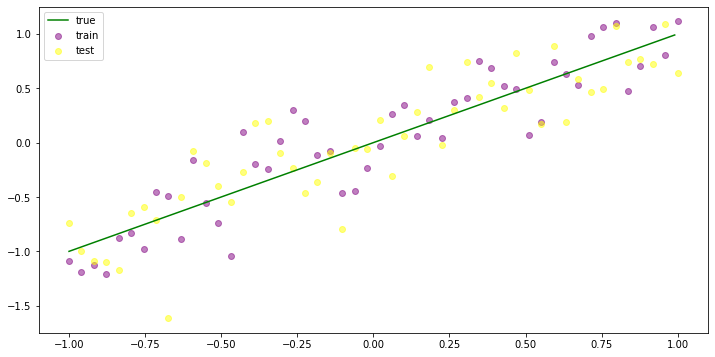

In [ ]:
N = 50
noise = 0.3

X_train = torch.unsqueeze(torch.linspace(-1, 1, N),1)
Y_train = X_train + noise * torch.normal(torch.zeros(N,1), torch.ones(N,1))

X_test = torch.unsqueeze(torch.linspace(-1,1,N),1)
Y_test = X_test + noise * torch.normal(torch.zeros(N,1), torch.ones(N,1))

plt.figure(figsize=(12, 6))
plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c='purple', alpha=0.5, label='train')
plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c='yellow', alpha=0.5, label='test')

x_real = np.arange(-1, 1, 0.01)
y_real = x_real
plt.plot(x_real, y_real, c="green", label='true')
plt.legend();

In [ ]:
N_h = 100

model = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)

opt = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
model_dropout = nn.Sequential(
    nn.Linear(1, N_h),
    nn.Dropout(0.5),
    nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    nn.Dropout(0.2),
    nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)

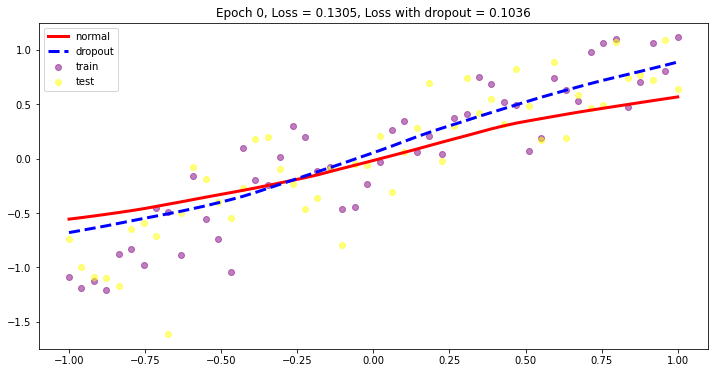

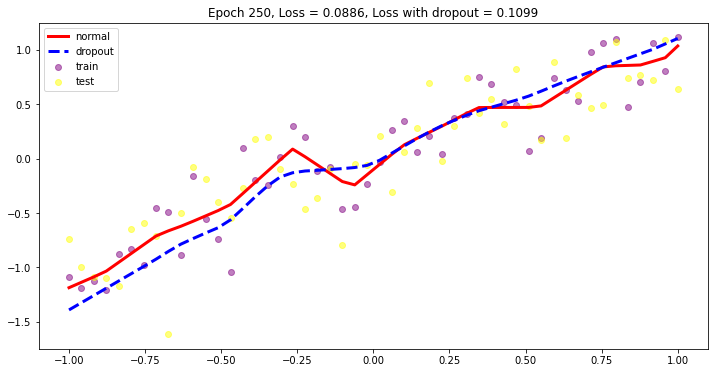

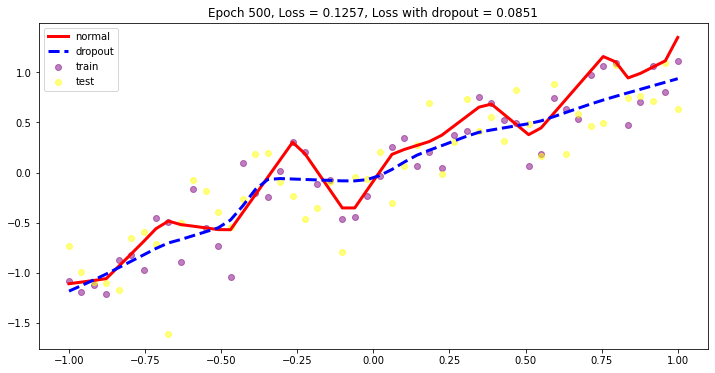

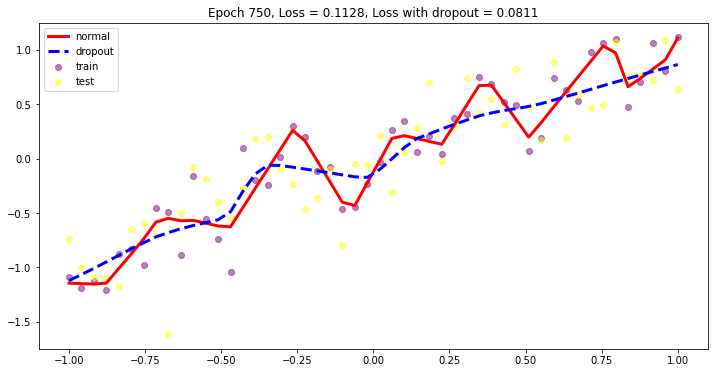

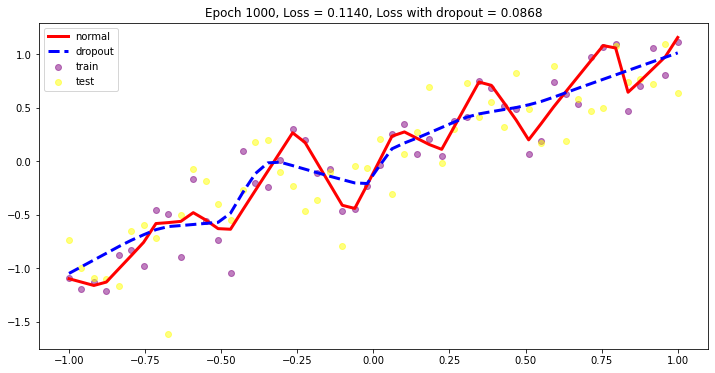

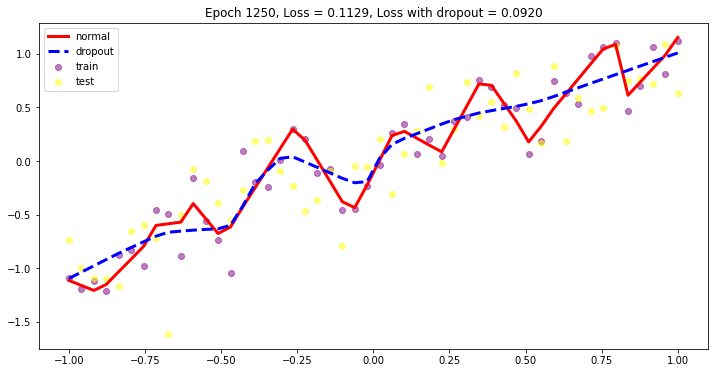

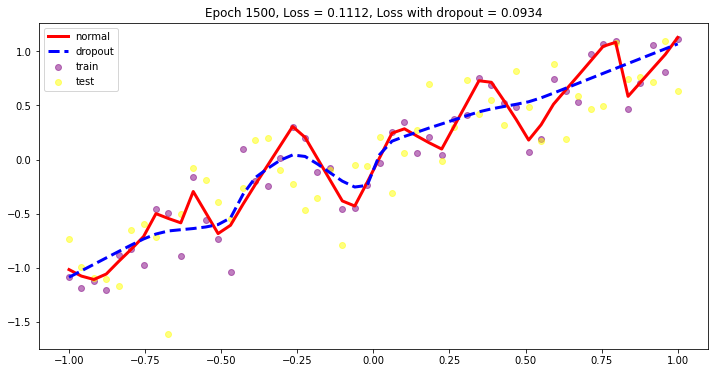

In [ ]:
loss_fn = torch.nn.MSELoss()

max_epochs = 1501

for epoch in range(max_epochs):

    pred = model(X_train)
    loss = loss_fn(pred, Y_train)
    opt.zero_grad()
    loss.backward()
    opt.step()

    pred_dropout = model_dropout(X_train)
    loss_dropout = loss_fn(pred_dropout, Y_train)
    opt_dropout.zero_grad()
    loss_dropout.backward()
    opt_dropout.step()


    if epoch % 250 == 0:

        model.eval()
        model_dropout.eval()

        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, Y_test)

        test_pred_dropout = model_dropout(X_test)
        test_loss_dropout = loss_fn(test_pred_dropout, Y_test)

        plt.figure(figsize=(12, 6))
        plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c='purple', alpha=0.5, label='train')
        plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
        plt.plot(X_test.data.numpy(), test_pred.data.numpy(), 'r-', lw=3, label='normal')
        plt.plot(X_test.data.numpy(), test_pred_dropout.data.numpy(), 'b--', lw=3,  label='dropout')

        plt.title('Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f' % (epoch, test_loss, test_loss_dropout))

        plt.legend()

        model.train()
        model_dropout.train()

        plt.pause(0.15)

Также существуют такие приёмы как DropConnect, DropBlock, DropPath и др.

## Батч-нормализация


Нормализация входного слоя нейронной сети обычно выполняется путем масштабирования данных, подаваемых в функции активации. Например, когда есть некоторые признаки со значениями от 0 до 1 и другие признаки со значениями от 1 до 1000, то их необходимо нормализовать, чтобы ускорить обучение. Нормализацию данных можно выполнить и в скрытых слоях нейронных сетей, что и делает метод батч-нормализации.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/bn.png" alt="Drawing" align="center" width= "500px;"/>

Надо дать нейросети возможность самой перемещать распределение слоя и подбирать дисперсию (в т.ч. и "отменять" нормализацию!)


Алгоритм батч-нормализации можно представить так:

**Вход**: значения $x$ из батча $B=\{x_1,…,x_m\}$; настраиваемые параметры $γ,β$; константа $ϵ$ для вычислительной устойчивости.

**Выход**: $\{y_i=BN_{γ,β}(x_i)\}$.

Считаем мат. ожидание батча:
$$μ_B=\frac{1}{m}\sum_{i=1}^{m}x_i$$

Считаем дисперсию батча:
$$σ^2_B=\frac{1}{m}\sum_{i=1}^{m}(x_i−μ_B)2$$

Производим нормализацию:
$$\hat{x}_i=\frac{x_i−μ_B}{\sqrt{σ^2_B+ϵ}}$$

Производим сжатие и сдвиг при помощи обучаемых параметров:
$$y_i=γ\hat{x}_i+β≡BN_{γ,β}(x_i)$$

Заметим, что если $β=μ_B$ и $γ=\sqrt{σ^2_B+ϵ}$, то $y_i$ равен $x_i$, то есть $BN_{γ,β}(⋅)$ является тождественным отображением. Таким образом, использование батч-нормализации не может привести к снижению точности, поскольку оптимизатор просто может использовать нормализацию как тождественное отображение (отмена нормализации).

BatchNorm это **чрезвычайно** мощный метод.

Нейросети с батч-нормализацией:

1. Сходятся быстрее;
2. Могут работать с намного более высоким параметром скорости обучения;
3. Могут быть очень глубокими даже с насыщаемыми функциями активации.

### Вычисление градиента

$$\frac{∂l}{∂\hat{x}_i}=\frac{∂l}{∂y_i}⋅γ$$

$$\frac{∂l}{∂σ^2_B}=\sum_{i=1}^{m}\frac{∂l}{∂\hat{x}_i}⋅(x_i−μ_B)⋅\frac{−1}{2}(σ^2_B+ϵ)^{−3/2}$$

$$\frac{∂l}{∂μ_B}=(\sum_{i=1}^{m}\frac{∂l}{∂\hat{x}_i}⋅\frac{−1}{\sqrt{σ^2_B+ϵ}})+\frac{∂l}{∂σ^2_B}⋅\frac{\sum_{i=1}^{m}−2(x_i−μ_B)}{m}$$

$$\frac{∂l}{∂x_i}=\frac{∂l}{∂\hat{x}_i}⋅\frac{1}{\sqrt{σ^2_B+ϵ}}+\frac{∂l}{∂σ^2_B}⋅\frac{2(x_i−μ_B)}{m}+\frac{∂l}{∂μ_B}⋅\frac{1}{m}$$

$$\frac{∂l}{∂γ}=\sum_{i=1}^{m}\frac{∂l}{∂y_i}⋅\hat{x}_i$$

$$\frac{∂l}{∂β}=\sum_{i=1}^{m}\frac{∂l}{∂y_i}$$

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/bn_grad.png" alt="Drawing" align="center" width= "800px;"/>

### Практические нюансы

А как правильно, BN до активации или BN после активации?

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/bn.png" alt="Drawing" align="center" width= "500px;"/>

Выходит, что зависит от используемой функции активации и архитектуры сети. BN до сигмоиды решает проблему затухания градиента, а после не решает. BN до ReLU не решает проблему "умирания ReLU", а после - решает.

А как правильно, батчнорм до дропаута или батчнорм после дропаута?

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/bn_do.png" alt="Drawing" align="center" width= "500px;"/>

Тут тоже есть свои нюансы, и надо экспериментировать!

Стоит помнить, что с батч-нормализацией:

* **Крайне важно** перемешивать батчи между эпохами. Единицей обучения параметров $\beta$ и $\gamma$ являются батчи. Если их не перемешивать, то из 6400 объектов в тренировочном датасете при batch_size = 64 получим лишь 100 объектов для обучения $\beta$ и $\gamma$

* В слое, после которого поставили BatchNormalization, надо убрать смещения (параметр $\beta$ в BatchNormalization берет эту роль сам по себе)

* Если используем BatchNormalization, то надо уменьшить силу Dropout и L2-регуляризации

* Чем меньше размер батча в обучении, тем хуже будет работать BatchNormalization


### Другие виды нормализаций



<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/batch_normalization.png" alt="Drawing" align="center" width= "800px;"/>

#### Layer Norm

Нормализуем активации не вдоль объектов, а вдоль признаков, для каждого объекта индивидуально. Хорошо работает для рекуррентных нейронных сетей (будут через лекцию)


#### Instance Norm

Чтобы не терять характеристики объектов, например, в задачах переноса стиля, используется индивидуальная нормализация - нормализация по каналу, но только для данного объекта.


#### GroupNorm

Нормализуем активации по группам каналов (**feature_map**), как и в BatchNorm, но только для данного объекта, эффективен для небольших батчей.


### Weights standartization 3d

Здесь другие оси: будем нормализовать **веса (!)** каждого выходного слоя отдельно.
Это улучшает оптимизационный ландшафт функции потерь.

## Оптимизаторы

Помимо стохастического градиентного спуска, существуют десятки способов обновлять веса нейросети (к каждому из которых ещё можно добавлять регуляризацию, скажем, $L2$).

Минусы обычного SGD:

 1. Если функция ошибки быстро меняется в одном направлении и медленно - в другом, то это приводит к резким изменениям направления  градиентов и замедляет процесс обучения - медленнее сходимость.

 2. Может застревать в локальных минимумах или седловых точках.

 3. Так как мы оцениваем градиенты по малой части выборки, они могут плохо отображать градиент по всей выборке и являться шумными. В результате часть шагов градиентного спуска делаются впустую или во вред.

 4. Мы применяем один и тот же learning rate ко всем параметрам, что не всегда разумно.


`optimizer = torch.optim.SGD([parameters], lr=0.001)`

Оптимайзер в PyTorch это сущность, которая осуществляет обратное распространение ошибки и обновление весов по соответствующему правилу.

### Momentum

Можно добавить инерцию движению оптимизируемых весов. Если представить наши текущие веса как координаты шарика с ненулевой массой, то он теперь может "перескакивать" через небольшие "горки" по инерции, выскакивая из локальных минимумов.

Сначала пытаемся поменять направление движения шарик с прежнего направления с учетом текущего градиента
$$v_{t+1} = \rho v_t + \nabla_wL(x, y, W)$$

Вычисляем, куда он покатится
$$w_{t+1} = w_t - \eta v_{t+1}$$


У этого подхода есть минус: возможно выкатиться за пределы не только локальных, но и глобального минимума.


`optimizer = torch.optim.SGD([parameters], momentum=0.9, lr=0.001)`

### NAG (Nesterov momentum)

Будем сначала смещаться в сторону, куда привел бы нас наш накопленный градиент (по инерции), там считать новый градиент и смещаться уже по нему.
В результате перескоки через минимум будут менее значительными и мы будем быстрее сходиться

$$v_{t+1} = \rho v_t +  \nabla_w L(w + \rho v_t )$$

$$w_{t} = w_{t-1} - \eta v_{t} $$

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/nm.png" alt="Drawing" align="center" width= "800px;"/>

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/m_vs_nm.png" alt="Drawing" align="center" width= "800px;"/>


`optimizer = torch.optim.SGD([parameters], momentum=0.9, nesterov=True, lr=0.001)`

### Адаптивные скорости обучения для индивидуальных параметров

Если данные сложные и несбалансированные, а это часто так, то некоторые фильтры нейросети (например, нейроны, реагирующие на калифорнийского кондора), будут обновляться очень редко, и мы плохо научим нашу нейросеть распознавать калифорнийского кондора на фотографиях дикой природы.

Единственный путь, как это обойти, - это завести для каждого параметра индивидуальный learning rate.

### Adagrad

Для каждого параметра хранится сумма квадратов его градиентов.

При обновлении веса будем добавлять градиент с коэффициентом, обратно пропорциональным корню из этой суммы на предыдущем шаге. Этот коэффициент выступает в роли некоторого подобия средней амплитуды градиента данного параметра.

$$ w = w - \eta \frac{l}{\sqrt{G} + e} \odot (\nabla_w L(x,y,W)) $$

$$ G = \sum_{t=1}^T \nabla_w L(x,y,w_t)^2 $$

Итого, если градиент у нашего веса часто большой - коэффициент будет уменьшаться.

Проблема: при такой формуле learning rate затухает, т.к. сумма квадратов не убывает.


`optimizer = torch.optim.Adagrad([parameters])`

### RMSprop

Добавим "забывание" предыдущих квадратов градиентов путём домножения их на некий коэффициент меньше 0


$$v_t = \alpha v_{t-1} + (1-\alpha) (\nabla_w L(x,y,w_t))^2$$

$$w = w - \frac{\eta}{\sqrt{v_t }+ e} \odot \nabla_w L(x,y,W)$$

Это решает проблему Adagrad с затуханием $lr$.  


`optimizer = optim.RMSprop([parameters], alpha=0.99)`

### Adam

Один из самых популярных адаптивных оптимизаторов. Он основан на соединении идеи с инерцией и идеи с суммой квадратов.

Пришло из Momentum:
$$ m_t = \beta_1 m_{t-1} + (1-\beta_1) (\nabla_w L(x,y,w_t)) $$

Пришло из RMSprop:
$$ v_t = \beta_2 v_{t-1} + (1-\beta_2) (\nabla_w L(x,y,w_t)^2) $$

Итого:
$$ w = w - \eta \cdot \frac{m_t}{\sqrt{v_t} + e} $$

Т.к. вначале могут быть очень большие шаги, можно дополнительно модицифировать инерцию и сумму квадратов:


$$ m_t = \frac{m_t}{1-\beta_1^t} $$

$$ v_t = \frac{v_t}{1-\beta_2^t} $$

И $\beta_1$, и $\beta_2$ меньше 1, поэтому такая нормировка вносит серьёзный вклад только на первых этапах (возведение в степень номера шага).

`optimizer = optim.Adam([parameters], betas=(0.9, 0.999))`

### Сравнение оптимизаторов

У каждого из предложенных оптимизаторов есть минусы и плюсы



1. Методы с инерцией сходятся к решению более плавно, но могут "перелетать" через нужный оптимум;
2. Методы с инерцией осцилируют в седловых точках прежде чем найти верный путь;
3. Методы с адаптивным learning rate быстрее сходятся, более стабильны и меньше случайно блуждают;
4. Методы без адаптивного learning rate сложнее выбираются из локальных минимумом.

<table>
  <tr>
    <td style="padding:1px">
      <figure>
      <img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/adaptive_stability.gif" style="width: 90%" title="Optimizers">
      </figure>
    </td>
    <td style="padding:1px">
      <figure>
      <img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/local_minima.gif" style="width: 90%" title="Optimizers">
      </figure>
    </td>
  </tr>
  <tr>
    <td style="padding:1px">
      <figure>
      <img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/opt_smooth.gif" style="width: 90%" title="Optimizers">
      </figure>
    </td>
    <td style="padding:1px">
      <figure>
      <img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/saddle_point.gif" style="width: 90%" title="Optimizers">
      </figure>
    </td>
  </tr>
</table>

## Режимы обучения

При правильно подобранной схеме уменьшения learning rate (lr) даже SGD сходится к глобальному минимуму.

Не обязательно поддерживать один и тот же lr в течение всего обучения, его можно менять по некоторым правилам.  

1. Когда $loss$ на валидационной выборке не улучшается $p$ эпох, умножить lr на некий $coef$.
`torch.optim.lr_schedule.ReduceLROnPlateau`

2. Домножение скорости обучения на некий коэффициент каждую эпоху:
  * На константу. `torch.optim.lr_scheduler.StepLR`
  * Cyclical learning schedule - то повышать, то понижать lr, причём границы возможных значений lr тоже можно сдвигать. **Чрезвычайно мощный метод**. Подбор границ lr делать таким образом: на каждое значение lr из некоторого отрезка будет один батч, этого достаточно для грубой прикидки.
  `optim.lr_scheduler.CyclicLR`

3. Warm-up
  * Поставить изначальный lr значительно ниже того, с которого обычно начинается обучение. За несколько эпох довести lr от этого значения до требуемого. В таком подходе наша нейросеть лучше "адаптируется" к нашим данным.


Помните, что в PyTorch scheduler'ам надо передавать optimizer, а не parameters, а не то ничего не запустится.

## DL в иммунологии

В иммунологии есть некоторое количество важных задач, которые решают при помощи ML/DL, одна из которых - предсказание связывания пептида с MHC (антиген-презентация). К ней подходят и с CNN, и с RNN, и с комбинациями. Нейросети достаточно глубокие, и им нужен BN и многие другие фишки, которые мы обсуждали сегодня.



Source: https://doi.org/10.3389/fimmu.2019.02559
<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/hla.png" alt="Drawing" width= "1000px;"/>


Другая задача - HLA imputation. Суть заключается в том, что несмотря на удешевление технологии NGS, данных с нормально отсеквенированным MHC-регионом (6p21.3) недостаточно для серьёзных популяционных исследований про связь HLA аллелей с различными заболеваниями (fine-mapping). Но достаточно много простеньких SNP-генотипирований, и люди по снипам предсказывают аллели HLA.

Source: https://doi.org/10.1038/s41467-021-21975-x
<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/hla_imputation.png" alt="Drawing" width= "1200px;"/>


Также есть задачи по предсказанию связываний эпитопов с TCR/BCR, классификаций репертуаров, in silico генерации антител против заданных мишеней и пр.

Source: https://doi.org/10.1146/annurev-chembioeng-101420-125021

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/review_immuno.png" alt="Drawing" width= "1200px;"/>


Source: https://doi.org/10.1038/s41467-021-21879-w

В этой работе сначала выучили внутренние особенности TCR при помощи VAE, а потом блок энкодера использовали для задач предсказания аффинности.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/tcr_vae.png" alt="Drawing" width= "1000px;"/>

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/BP_BN_opt/tcr.png" alt="Drawing" width= "800px;"/>

